In [27]:
import sys
import serial
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]
import skrf as rf
sys.path.append("gpib_instrument_control")
import gpib_instrument_control.hp_8700_series_vna

v=gpib_instrument_control.hp_8700_series_vna.Hp8753A();
cks=serial.Serial('/dev/ttyUSB0', 115200)

In [32]:
cks.write(b'S')
m_short=v.getHighResolutionNetwork(fstart=130e6, fstop=20e9, fres=1e6)
m_short.drop_non_monotonic_increasing()
m_short.write_touchstone('cal_bpf/short3.s2p')

cks.write(b'O')
m_open=v.getHighResolutionNetwork(fstart=130e6, fstop=20e9, fres=1e6)
m_open.drop_non_monotonic_increasing()
m_open.write_touchstone('cal_bpf/open3.s2p')

cks.write(b'L')
m_load=v.getHighResolutionNetwork(fstart=130e6, fstop=20e9, fres=1e6)
m_load.drop_non_monotonic_increasing()
m_load.write_touchstone('cal_bpf/load3.s2p')

cks.write(b'T')
m_through=v.getHighResolutionNetwork(fstart=130e6, fstop=20e9, fres=1e6)
m_through.drop_non_monotonic_increasing()
m_through.write_touchstone('cal_bpf/through3.s2p')


measured=[m_short, m_open, m_load, m_through]

In [ ]:
print(len(m_short.s))

In [4]:
s_short=rf.Network('cal_stds/short.s2p')
s_open=rf.Network('cal_stds/open.s2p')
s_load=rf.Network('cal_stds/load.s2p')
s_through=rf.Network('cal_stds/through.s2p')

ideals=[s_short, s_open, s_load, s_through]

Success
Success
Success
Success


/home/bjohan/.local/lib/python3.10/site-packages/skrf/calibration/calibration.py:1445: UserWarning: n_thrus is None, guessing which stds are transmissive
  warn('n_thrus is None, guessing which stds are transmissive')


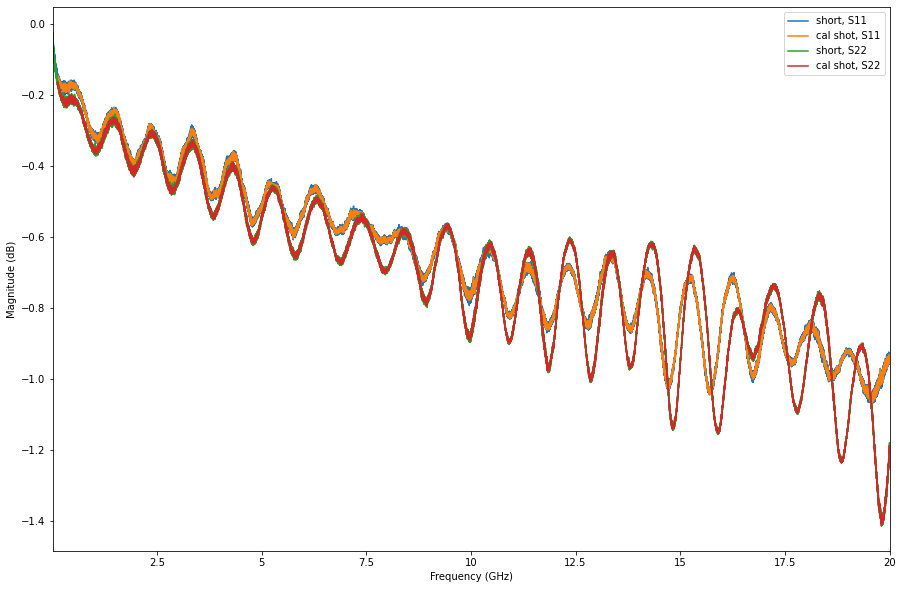

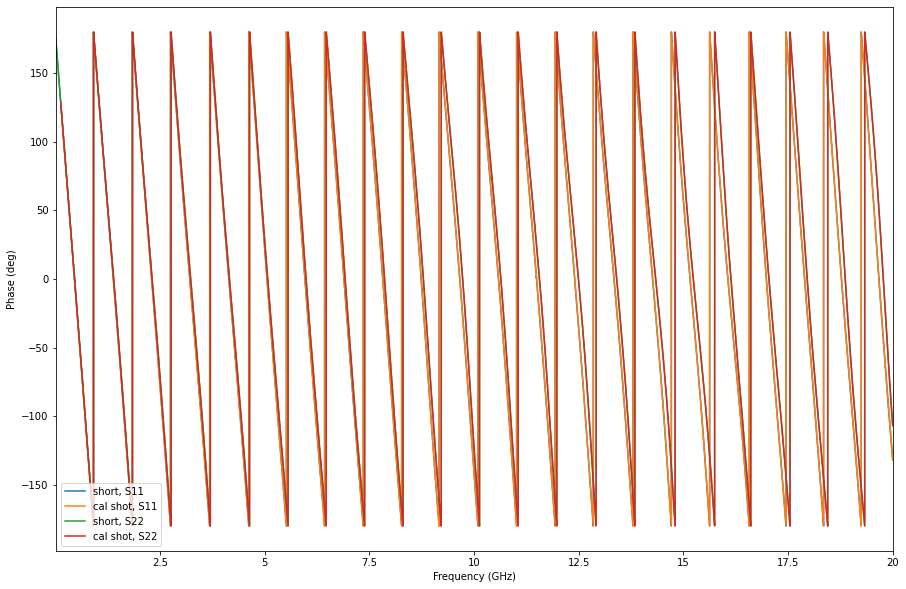

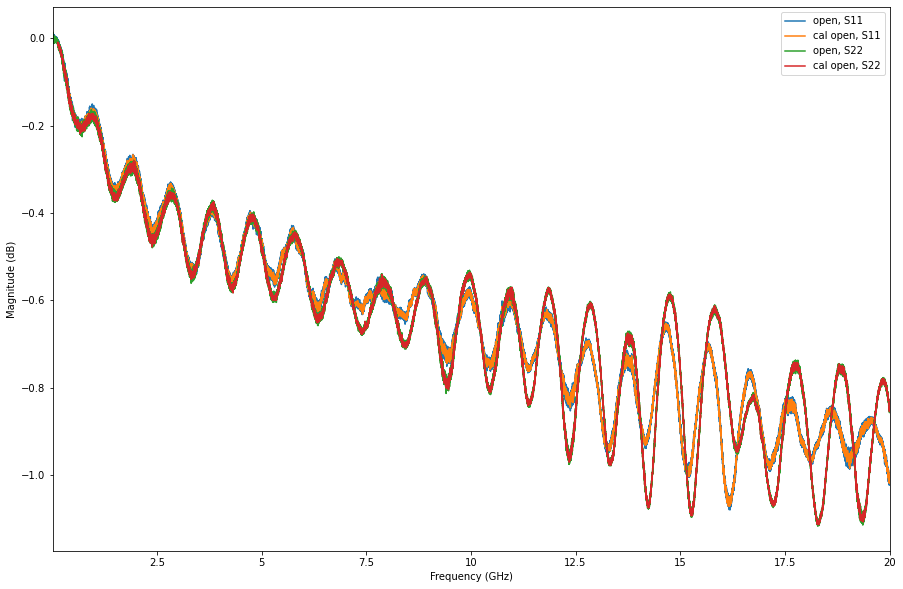

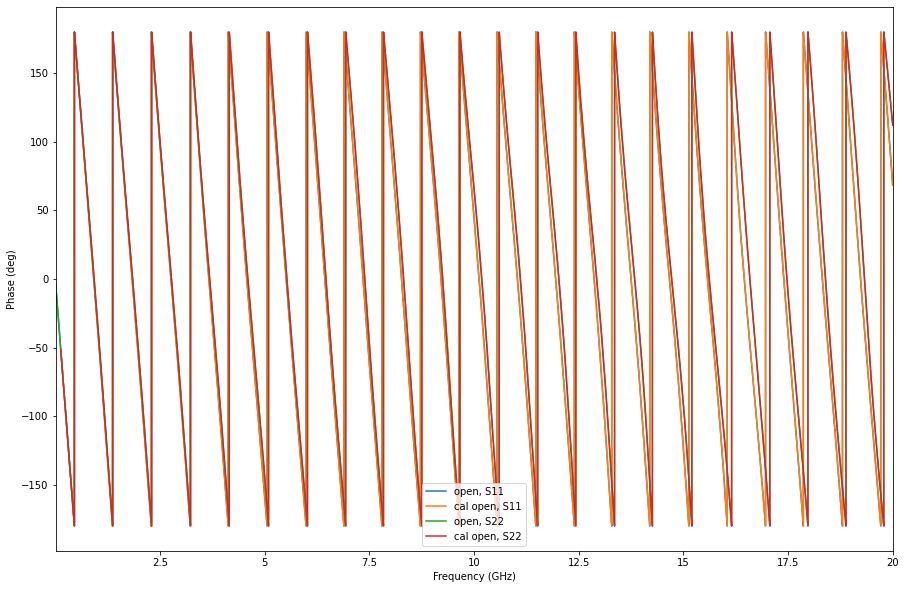

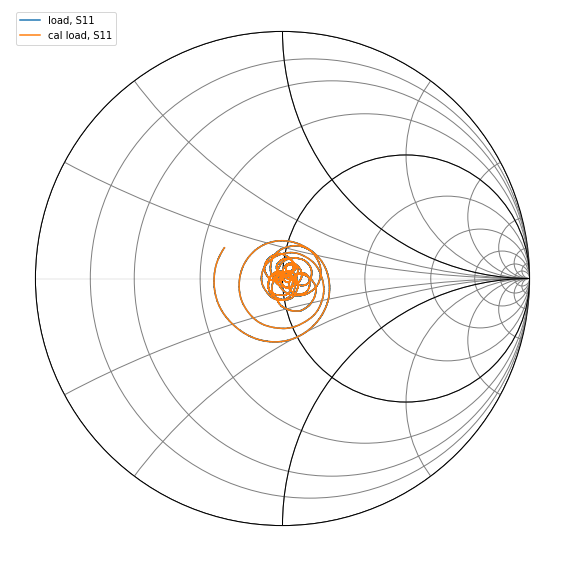

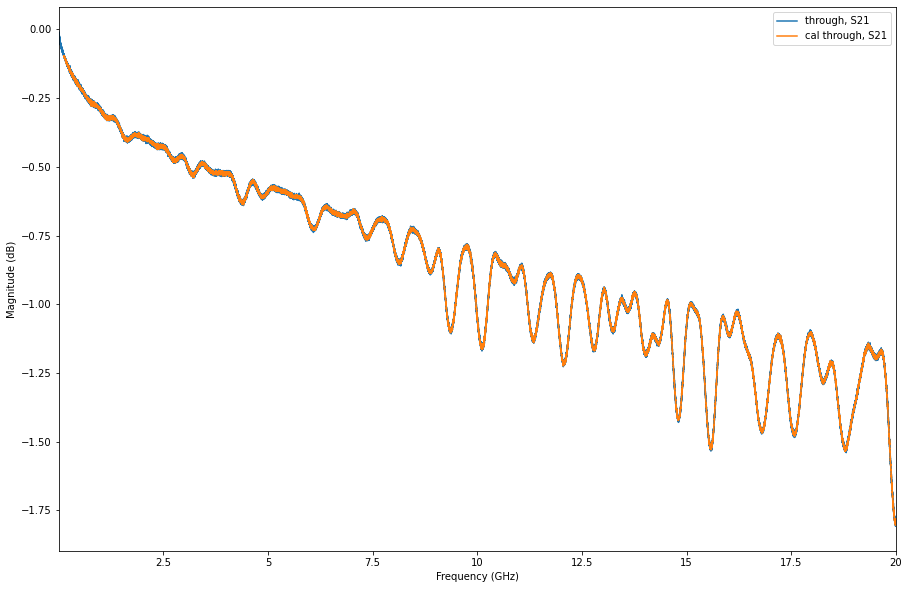

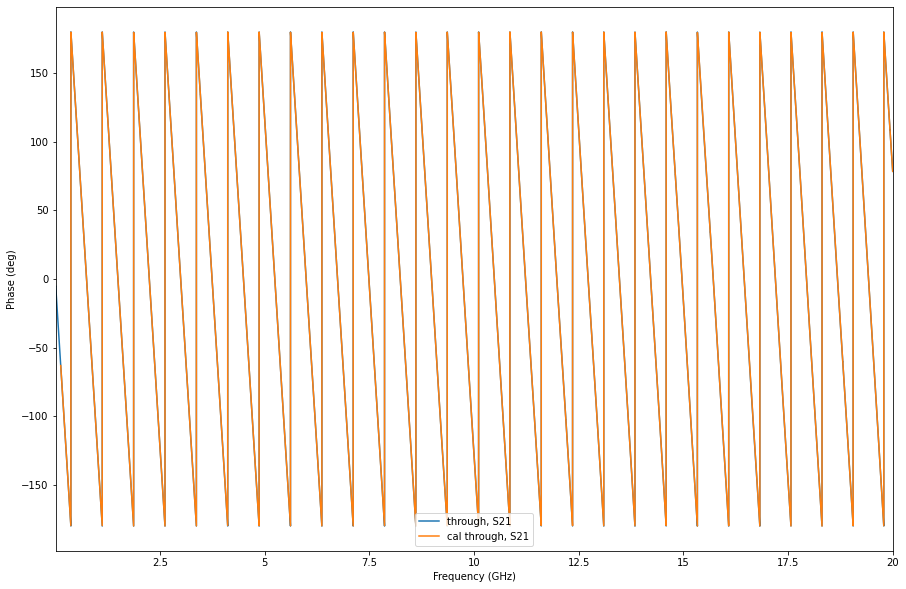

In [5]:
from skrf.calibration import TwelveTerm
import numpy as np

m_short=rf.Network('cal_bpf/short2.s2p')
m_open=rf.Network('cal_bpf/open2.s2p')
m_load=rf.Network('cal_bpf/load2.s2p')
m_through=rf.Network('cal_bpf/through2.s2p')

measured=[m_short, m_open, m_load, m_through]
cal = TwelveTerm(ideals = ideals, measured = measured)
cal.run()
cal_short = cal.apply_cal(m_short)
cal_short.name='cal shot'

cal_open = cal.apply_cal(m_open)
cal_open.name='cal open'

cal_load = cal.apply_cal(m_load)
cal_load.name='cal load'

cal_through = cal.apply_cal(m_through)
cal_through.name='cal through'


s_short.plot_s_db(m=0,n=0)
cal_short.plot_s_db(m=0,n=0)
s_short.plot_s_db(m=1,n=1)
cal_short.plot_s_db(m=1,n=1)

plt.figure()
s_short.plot_s_deg(m=0,n=0)
cal_short.plot_s_deg(m=0,n=0)
s_short.plot_s_deg(m=1,n=1)
cal_short.plot_s_deg(m=1,n=1)



plt.figure()
s_open.plot_s_db(m=0,n=0)
cal_open.plot_s_db(m=0,n=0)
s_open.plot_s_db(m=1,n=1)
cal_open.plot_s_db(m=1,n=1)

plt.figure()
s_open.plot_s_deg(m=0,n=0)
cal_open.plot_s_deg(m=0,n=0)
s_open.plot_s_deg(m=1,n=1)
cal_open.plot_s_deg(m=1,n=1)



plt.figure()
s_load.plot_s_smith(m=0,n=0)
cal_load.plot_s_smith(m=0,n=0)

plt.figure()
s_through.plot_s_db(m=1,n=0)
cal_through.plot_s_db(m=1,n=0)

plt.figure()
s_through.plot_s_deg(m=1,n=0)
cal_through.plot_s_deg(m=1,n=0)

In [33]:
bpf=serial.Serial('/dev/ttyUSB3', 115200)

In [34]:
bpf.write(b'1')
m_filter_1=v.getHighResolutionNetwork(fstart=130e6, fstop=20e9, fres=1e6)
m_filter_1.write_touchstone('bpf_measure2/m_filter3_1.s2p')

bpf.write(b'2')
m_filter_2=v.getHighResolutionNetwork(fstart=130e6, fstop=20e9, fres=1e6)
m_filter_2.write_touchstone('bpf_measure2/m_filter3_2.s2p')

bpf.write(b'3')
m_filter_3=v.getHighResolutionNetwork(fstart=130e6, fstop=20e9, fres=1e6)
m_filter_3.write_touchstone('bpf_measure2/m_filter3_3.s2p')

bpf.write(b'4')
m_filter_4=v.getHighResolutionNetwork(fstart=130e6, fstop=20e9, fres=1e6)
m_filter_4.write_touchstone('bpf_measure2/m_filter3_4.s2p')

bpf.write(b'5')
m_filter_5=v.getHighResolutionNetwork(fstart=130e6, fstop=20e9, fres=1e6)
m_filter_5.write_touchstone('bpf_measure2/m_filter3_5.s2p')

bpf.write(b'6')
m_filter_6=v.getHighResolutionNetwork(fstart=130e6, fstop=20e9, fres=1e6)
m_filter_6.write_touchstone('bpf_measure2/m_filter3_6.s2p')

bpf.write(b'7')
m_filter_7=v.getHighResolutionNetwork(fstart=130e6, fstop=20e9, fres=1e6)
m_filter_7.write_touchstone('bpf_measure2/m_filter3_7.s2p')

bpf.write(b'8')
m_filter_8=v.getHighResolutionNetwork(fstart=130e6, fstop=20e9, fres=1e6)
m_filter_8.write_touchstone('bpf_measure2/m_filter3_8.s2p')

bpf.write(b'9')
m_filter_9=v.getHighResolutionNetwork(fstart=130e6, fstop=20e9, fres=1e6)
m_filter_9.write_touchstone('bpf_measure2/m_filter3_9.s2p')

bpf.write(b'a')
m_filter_a=v.getHighResolutionNetwork(fstart=130e6, fstop=20e9, fres=1e6)
m_filter_a.write_touchstone('bpf_measure2/m_filter3_a.s2p')

bpf.write(b'b')
m_filter_b=v.getHighResolutionNetwork(fstart=130e6, fstop=20e9, fres=1e6)
m_filter_b.write_touchstone('bpf_measure2/m_filter3_b.s2p')



In [11]:
m_splitter=v.getHighResolutionNetwork(fstart=130e6, fstop=20e9, fres=1e6);
m_splitter.write_touchstone('splitter_DMS211_back_to_back.s2p');

In [21]:
bypass=v.getHighResolutionNetwork(fstart=130e6, fstop=20e9, fres=1e6);
bypass.write_touchstone('bpf_measure2/bypass3_rg402_2.s2p');

In [22]:
bypass=v.getHighResolutionNetwork(fstart=130e6, fstop=20e9, fres=1e6);
bypass.write_touchstone('bpf_measure2/bypass3_uk_nice.s2p');

In [26]:
bypass=v.getHighResolutionNetwork(fstart=130e6, fstop=20e9, fres=1e6);
bypass.write_touchstone('bpf_measure2/bypass3_rigid.s2p');

In [13]:
bypass=v.getHighResolutionNetwork(fstart=130e6, fstop=20e9, fres=1e6);
bypass.write_touchstone('bpf_measure2/through.s2p');